# TENSORFLOW -  BERT EMBEDING - NLP

In [23]:
# Import needed libraries
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import seaborn as sn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# get tensorflow version
tf.__version__

'2.7.0'

## Handwritten digits classicfication

- (computer vision)

In [3]:
# get buildin dataset mnist = hand-written dataset
hand_writen_data = tf.keras.datasets.mnist # 28x28 image if hand-written digit 0-9

In [4]:
# unpack this dataset to get X_train, y_train, X_test and y_test
(X_train, y_train), (X_test, y_test) = hand_writen_data.load_data()
# scale X_train with keras utils
X_train = tf.keras.utils.normalize(X_train, axis=1) # value range : 0-255 ---> 0-1
# scale X_train with keras utils
X_test = tf.keras.utils.normalize(X_test, axis=1) # value range : 0-255 ---> 0-1

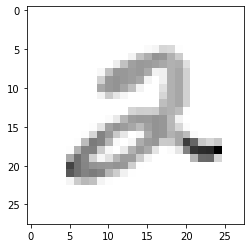

In [6]:
# use imshow() method to plot image (2-dim array)
plt.imshow(X_train[5], cmap = plt.cm.binary)
plt.show()
# print(X_train[0])

In [7]:
# get the shape of fist image ---> 28 x 28 here :
X_train[0].shape

(28, 28)

**Build a sequential model**

In [8]:
# get the sequential for keras models
model = tf.keras.models.Sequential()
# add a flatten keras layer to pass from 2-dim to 1-dim vector
model.add(tf.keras.layers.Flatten())
# add a first hidden dense layer with 128 (or 150) neurons and take 'relu' as activation function
model.add(tf.keras.layers.Dense(150, activation=tf.nn.relu))
# add a second hidden dense layer with 100 (or 150) neurons and take 'relu' as activation function
model.add(tf.keras.layers.Dense(150, activation=tf.nn.relu))
# add a first hidden dense layer with 1O neurons and take 'softmax' or 'sigmoid' as activation function
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

2022-01-05 17:15:53.570387: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# complie the created model with chosen optimizer, loss function and metrics
model.compile(optimizer='adam', # adam optimzer is chosen here
             loss='sparse_categorical_crossentropy', #This is the crossentropy metric class used when there are multiple label classes (2 or more).
             metrics=['accuracy']) # accuray in [] as metric as evaluator

In [10]:
# Train the model with a chosen epochs number
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2601 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1066 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0691 - accuracy: 0.9781
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0507 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0382 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0298 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0235 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0203 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0173 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.015

In [11]:
# get summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 150)                 117750    
                                                                 
 dense_1 (Dense)             (32, 150)                 22650     
                                                                 
 dense_2 (Dense)             (32, 10)                  1510      
                                                                 
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________


In [12]:
# evaluate the model performance on test set (unseen images) to get its loss value and its accuracy.
val_loss, val_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1018 - accuracy: 0.9764


In [13]:
# print the value
print(val_loss)

0.10184358805418015


In [14]:
# print the accuray goten from unseen images
print(val_acc)

0.9764000177383423


In [16]:
# Save this model if needed to resuse it later
model.save("epic_num1_reader.model")

INFO:tensorflow:Assets written to: epic_num1_reader.model/assets


In [71]:
# reload saved model, named model_0 and get ready to make inference
model_0 = tf.keras.models.load_model("epic_num_reader.model")

In [73]:
# predict now 
y_pred = model_0.predict([X_test])

In [74]:
# convert y_pred to 0-1 values using numpy argmax() method
y_pred = [np.argmax(i) for i in y_pred]

In [77]:
# You can check the value of the accuracy as follows
np.sum(y_pred == y_test)/len(y_test)

0.9724

In [78]:
# tensorflow confusion matrix of the model_0
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

Text(0.5, 51.0, 'PREDICTED')

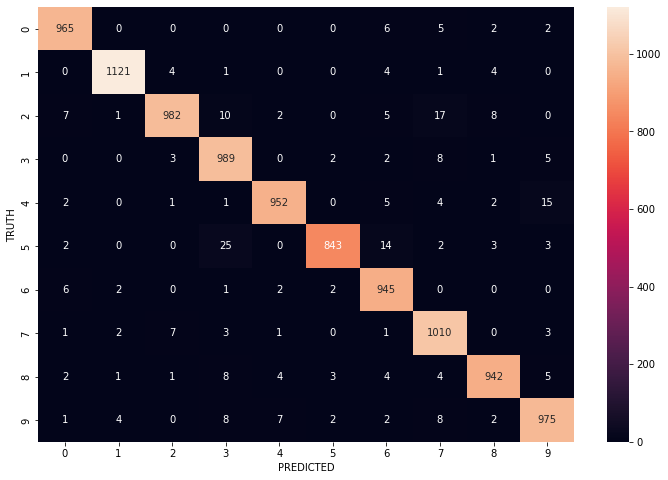

In [82]:
# plot the confusion matrix using heatmap() method from seaborn
plt.figure(figsize=(12,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.ylabel('TRUTH')
plt.xlabel('PREDICTED')

In [17]:
# reload saved model, named model_0 and get ready to make inference
model_1 = tf.keras.models.load_model("epic_num1_reader.model")

In [21]:
# predict now 
y_pred_1 = model_1.predict([X_test])
# get interger value
y_pred_1 = [np.argmax(n) for n in y_pred_1]
# y_pred_1

In [22]:
# You can check the value of the accuracy as follows
np.sum(y_pred_1 == y_test)/len(y_test)

0.9764

In [23]:
# get the confusion matrix now
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_1)

Text(0.5, 51.0, 'PREDICTED')

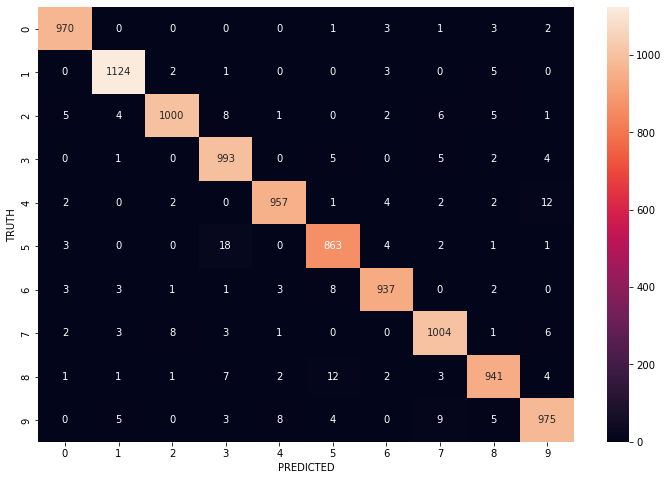

In [24]:
# plot it with seaborn
plt.figure(figsize=(12,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.ylabel('TRUTH')
plt.xlabel('PREDICTED')

## BERT EMBEDING

In [2]:
# The separate preprocessor transforms plain text inputs into this format
preprocessing_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
# It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads. 
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3'

In [3]:
# Get preprocessing model
bert_preprocessor_model = hub.KerasLayer(preprocessing_url) # It works like a function

2022-01-05 19:05:30.375324: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# define two sentences to make a test
text_test = ["I love Python and TensorFlow", "I love Football and science books"]

In [5]:
# get the preprocessed output wich is a dictionnary
preprocessed_text = bert_preprocessor_model(text_test) 
# get the keys
preprocessed_text.keys()

dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])

In [6]:
# get 'input_mask' value
preprocessed_text['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [7]:
# get 'input_type_ids' value
preprocessed_text['input_type_ids']
# "CLS I love Python and TensorFlow SEP" how the sentence is handled 

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [8]:
# get 'input_word_ids' value
preprocessed_text['input_word_ids']
# "CLS I love Football and science books SEP" how the sentence is handled

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  1045,  2293, 18750,  1998, 23435, 12314,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

![Bert Encoder](bert_encoder.png)

In [9]:
# Get a BERT encoder model now
encoder_model = hub.KerasLayer(encoder_url) # It works as well like function
# Get the embeded vectors of the text with BERT
results = encoder_model(preprocessed_text)

In [10]:
# get the keys of outpu dict()
results.keys()

dict_keys(['sequence_output', 'encoder_outputs', 'pooled_output', 'default'])

In [11]:
# give the entire sentence embeding vectors
results['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8995529 , -0.5356321 , -0.91199464, ..., -0.8257048 ,
        -0.72207105,  0.9219291 ],
       [-0.89574456, -0.51669   , -0.93176   , ..., -0.7261997 ,
        -0.70532763,  0.8962991 ]], dtype=float32)>

In [12]:
# individual word embeding vectors
results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[-0.11107964,  0.08823864, -0.22717197, ..., -0.13230553,
          0.23241132,  0.7932387 ],
        [ 0.4395987 ,  0.15172838, -0.5375723 , ...,  0.09262423,
          0.5756402 ,  0.3829119 ],
        [ 1.1082824 ,  1.0100073 ,  0.16809517, ...,  0.08841669,
          0.4604789 ,  0.2362263 ],
        ...,
        [ 0.11140786, -0.22311164,  0.5941936 , ...,  0.2510237 ,
         -0.10382512,  0.0680785 ],
        [ 0.07217243, -0.17395294,  0.5959269 , ...,  0.19067428,
         -0.12882724,  0.08898622],
        [ 0.12408946, -0.23401651,  0.59603626, ...,  0.20183903,
         -0.16713929,  0.03381471]],

       [[-0.03751563,  0.15176028, -0.28256917, ..., -0.12159795,
          0.5441942 ,  0.3342259 ],
        [ 0.5632214 ,  0.34896114, -0.68825334, ...,  0.03490646,
          1.0032351 ,  0.27804226],
        [ 1.2898136 ,  0.89609   ,  0.18848751, ...,  0.24121076,
          0.62545514, -0.05480353],
        ...,

In [13]:
# encoder size, here 12, is ther BERT base model used here.
len(results['encoder_outputs'])

12

In [14]:
 # see first layer output for instance
results['encoder_outputs'][0]

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.10128608,  0.00910405, -0.0735721 , ...,  0.10275786,
         -0.01996167, -0.04673343],
        [ 0.56409323,  0.7500502 , -0.18127108, ...,  0.53080887,
          0.7475175 , -0.11824867],
        [ 1.3730404 ,  0.6226032 ,  0.17862737, ...,  0.46330523,
          0.530566  , -0.1726723 ],
        ...,
        [ 0.07695337, -0.25388765,  0.52457416, ..., -0.0665512 ,
         -0.47931138,  0.0311453 ],
        [-0.01111341, -0.2714757 ,  0.3672256 , ..., -0.00743627,
         -0.3897387 , -0.06636451],
        [ 0.16202396, -0.21057442,  0.3803922 , ...,  0.35277197,
         -0.73191726, -0.16098821]],

       [[ 0.15216476,  0.03098231, -0.05242224, ...,  0.12761126,
          0.00197706,  0.00705218],
        [ 0.5581814 ,  0.86421776, -0.1855585 , ...,  0.564185  ,
          0.6811263 ,  0.07197858],
        [ 1.5002284 ,  0.4749437 ,  0.63678074, ...,  0.44263437,
          0.82352084, -0.01050963],
        ...,

In [15]:
# The sequence_output is also the last vector of encoder_output
results['encoder_outputs'][-1] == results['sequence_output'] # this captures the context sense of each word

<tf.Tensor: shape=(2, 128, 768), dtype=bool, numpy=
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])>

In [16]:
# Define a BERT embeding function below
def get_sentence_embeding(sentence):
  # Get the preprocessor
  bert_preprocesser = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3') 
  # Get the preprocessed output
  preprocessed_text = bert_preprocesser(sentence)
  # Get the BERT encoder
  bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3')
  # return entire sentence embeding vectors maker with ('pooled_output')
  return bert_encoder(preprocessed_text)['pooled_output']

#### Encode comment comments from Konvo project comments

In [34]:
comment = ["J'ai teste et beaucoup apprecie la pompe tamdem jusqu'a ce qu'elle ne fasse que sonner des alertes car elle ne supporte pas beaucoup d'insulines : j'ai ete obligee de l'abandonnerCette pompe ne doit etre utilisee dans le cadre de la boucle fermee qu'avec deux insulines : l'humalog et la novorapid.Si tu as une de ces deux insulines, vas-y, je pense que tu seras enchantee car ceux que je connais qui l'ont en boucle fermee avec le dexcom sont hyper satisfaits",
           "Bonjour à tous, Ma diabétologue m'a proposé un nouveau modèle de pompe : Tandem + Dexcom 6.Elle n'a pas encore de retour d'expérience mais m'indique que ça devrait être bien.Des forumeurs sont-ils passés d'une pompe + freestyle libre à ce nouveau modèle ?Est-ce vraiment bien, ou n'est-ce pas suffisamment abouti ou a trop de défauts ?Car je fais souvent des hyper, et apparemment ça corrigerait automatiquement.Je souhaite cependant que ce soit autonome et non recevoir des tonnes d'alertes...Merci"]

In [35]:
# get embeded vectors
encoded = get_sentence_embeding(comment)
# see the numercal vector comment_1
print(encoded[0][:10])

tf.Tensor(
[-0.5668514  -0.37270522 -0.7331215   0.4217456  -0.08565921 -0.1390364
 -0.19994736  0.2296162  -0.37876597 -0.999521  ], shape=(10,), dtype=float32)


In [36]:
# comppute cosine similarity
cosine_similarity([encoded[0]], [encoded[1]])

array([[0.96425295]], dtype=float32)

## E-mail Classification with BERT as encoder

![Bert](bert_spam.png)

In [68]:
# import spam dataset
df = pd.read_csv("spam.csv")
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [70]:
df.rename(columns={'v1': 'category', 'v2': 'message'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   category    5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [71]:
# take only the first columns  
data = df[df.columns[0:2]] 
data.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
# get infos about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [72]:
# get categories sizes with describe() method
data.groupby('category').describe()

message                                                            \
           count unique                                                top   
category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
category       
ham        30  
spam        4

In [76]:
# create a new column with apply method and lambda
data['spam'] = data['category'].apply(lambda x: 1 if x=='spam' else 0)

/Users/elhadji/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
# get data head
data.head()

,category,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [98]:
# split the dataset with a 20% testset and balance it with 'stratify'
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['spam'], test_size=0.2, stratify=data['spam'])

In [104]:
# proportion
y_train.value_counts()
# 598/3859 = 0.1549624254988339

0    3859
1     598
Name: spam, dtype: int64

In [105]:
# proportion
y_test.value_counts()
# 149/966 = 0.15424430641821946

0    966
1    149
Name: spam, dtype: int64

__Get embeding vectors for few sample words. Compare them using cosine similarity__

In [106]:
# get list words embding
emb = get_sentence_embeding([
    "banana", 
    "tomato",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [107]:
emb[0][:10] # ten firs items

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.7606919 , -0.14219391,  0.49604574,  0.5634578 , -0.32544807,
       -0.10426541,  0.8614954 ,  0.15325756,  0.23656519, -0.9989279 ],
      dtype=float32)>

In [108]:
emb[2][:10] # ten firs items

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.7128862 , -0.15463905,  0.3840169 ,  0.52369934, -0.4032679 ,
       -0.02961873,  0.8217411 ,  0.18807209,  0.14592233, -0.99867284],
      dtype=float32)>

In [109]:
vec = get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

In [113]:
# get the 15 items of the vector
vec[0][:15]

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([-0.8435169 , -0.5132725 , -0.88845724,  0.7896978 ,  0.65413976,
       -0.18269542,  0.87923324,  0.28665447, -0.79958403, -0.99998695,
       -0.5886882 ,  0.84621525,  0.97971356,  0.56166524,  0.929827  ],
      dtype=float32)>

In [114]:
# get the 15 items of the vector
vec[1][:15]

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([-0.8720836 , -0.5054398 , -0.9444667 ,  0.80241036,  0.7375801 ,
       -0.17518209,  0.89827764,  0.38746354, -0.83046186, -0.9999867 ,
       -0.60837066,  0.9425218 ,  0.9709391 ,  0.6960611 ,  0.88805103],
      dtype=float32)>

In [116]:
# Similary check message1 and message2
cosine_similarity([vec[0]], [vec[1]]) # it takes a two-dim array

array([[0.98974633]], dtype=float32)

In [24]:
# Similary check banana and mango
cosine_similarity([emb[0]], [emb[2]])

array([[0.99540985]], dtype=float32)

In [25]:
# Similary check banana and tomato
cosine_similarity([emb[0]], [emb[1]])

array([[0.97718817]], dtype=float32)

In [26]:
# Similary check banana and Jeff bezos
cosine_similarity([emb[0]], [emb[3]])

array([[0.8470385]], dtype=float32)

In [27]:
# Similary check elon musk and Jeff bezos
cosine_similarity([emb[4]], [emb[3]])

array([[0.9872034]], dtype=float32)

__Build the model__ :

- Function model : below we will build functional model.

In [120]:
# set preprocesser and encoder urls
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3')

In [121]:
############################## Bert layers #################################
# create the inputs of the neural netwoks
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
# get the preprocessed output
preprocessed_text = bert_preprocessor(text_input)
# get embeded outputs to input layer
outputs = bert_encoder(preprocessed_text)

############################### Neural network layers ########################
# get input layer result to pass the following layer
l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])
# get output layer result to pass to the model
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

############## Use inputs and outputs to construct a final model #############
model = tf.keras.Model(inputs=[text_input], outputs=[l])
# get summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

__Train the model__

In [124]:
# compile the model with chosen optimizer 'adam' and loss is binary_crossentropy as there only two classes
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [125]:
# train the model now : run ---> go 
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
140/140 [==============================] - 1652s 12s/step - loss: 0.3116 - accuracy: 0.8746
Epoch 2/10
140/140 [==============================] - 1665s 12s/step - loss: 0.2254 - accuracy: 0.9013
Epoch 3/10
140/140 [==============================] - 1644s 12s/step - loss: 0.1933 - accuracy: 0.9215
Epoch 4/10
140/140 [==============================] - 1671s 12s/step - loss: 0.1687 - accuracy: 0.9338
Epoch 5/10
140/140 [==============================] - 1574s 11s/step - loss: 0.1532 - accuracy: 0.9468
Epoch 6/10
140/140 [==============================] - 1551s 11s/step - loss: 0.1406 - accuracy: 0.9518
Epoch 7/10
140/140 [==============================] - 1627s 12s/step - loss: 0.1297 - accuracy: 0.9565
Epoch 8/10
140/140 [==============================] - 1515s 11s/step - loss: 0.1221 - accuracy: 0.9607
Epoch 9/10
140/140 [==============================] - 1515s 11s/step - loss: 0.1185 - accuracy: 0.9612
Epoch 10/10
140/140 [==============================] - 1512s 11s/step - l

__Evaluate the model__

In [126]:
# evaluation of the model on test set
model.evaluate(X_test, y_test)

35/35 [==============================] - 373s 11s/step - loss: 0.1201 - accuracy: 0.9713


[0.12005554884672165, 0.9713004231452942]

__Inference__

In [127]:
reviews = [
    'Reply to win Â£100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 .p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
# prediction on new texts
model.predict(reviews)

array([[0.80525136],
       [0.85495806],
       [0.56836283],
       [0.03813526],
       [0.00952628]], dtype=float32)

[BERT offial tutorial](https://www.tensorflow.org/text/tutorials/classify_text_with_bert?hl=fr)